# Import audio data and plot a spectrogram in Python

Léa Bouffaut, Ph.D. 
-- K. Lisa Yang Center for Conservation Bioacoustics
-- lea.bouffaut@cornell.edu

### Import necessary libraries

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

### Load the data

In [ ]:
data_path = 'audio/'
name = 'BowheadWhale_song.wav'

x, fs = librosa.load(data_path + name, sr=None, mono=False)

N = x.size;
print("fs =",fs," Hz")
print("data shape:", np.shape(x))
print("The smaller number indicates the number of channels, the larger the number the number of time samples")

fs = 48000  Hz
data shape: (945275,)
The smaller number indicates the number of channels, the larger the number the number of time samples


### (Option) Channel selection
for multichannel audio, you can select the channel of your choice 
Note, the signal BowheadWhale_song.wav has 5 channels, so you need to select one of them to do the spectrogram! 

> Skip of no channel selection needed

In [8]:
channel_number = 3
x = x[channel_number-1,].T

### (Option) High-pass filter the data 
A convenient way to to get rid of low frequency noise 
It will apply a butterworth high-pass filter to remove under the specified frequency
> Skip if no filtering needed

In [ ]:
f_min_filter = 3 
b, a = signal.butter(2, f_min_filter/(fs/2), 'high', analog=False)
x = signal.filtfilt(b, a, x)

### (Option) Select a portion of the recording
To select only a portion of the recording 
e.g., here between 5 s and 25 s!

> Skip if no time selection needed

In [ ]:
time_min_s = 5
time_max_s = 25
x = x[time_min_s*fs:time_max_s*fs]

### Prepare the spectrogram and saving parameters

In [ ]:
# Chose your spectrogram parameters
nfft = 256 # samples
overlap = 75 # (%) of overlap between two consecutive fft windows

# Colorbar
clim = -100,-65 #Min and max dB values for the spectrogram's colormap

# Figure saving name, here gives the figure the same name as the sound file. 
# Can be set manually e.g. my_fig_name = 'my_first_spectrogram'
my_fig_name = name[:-4]

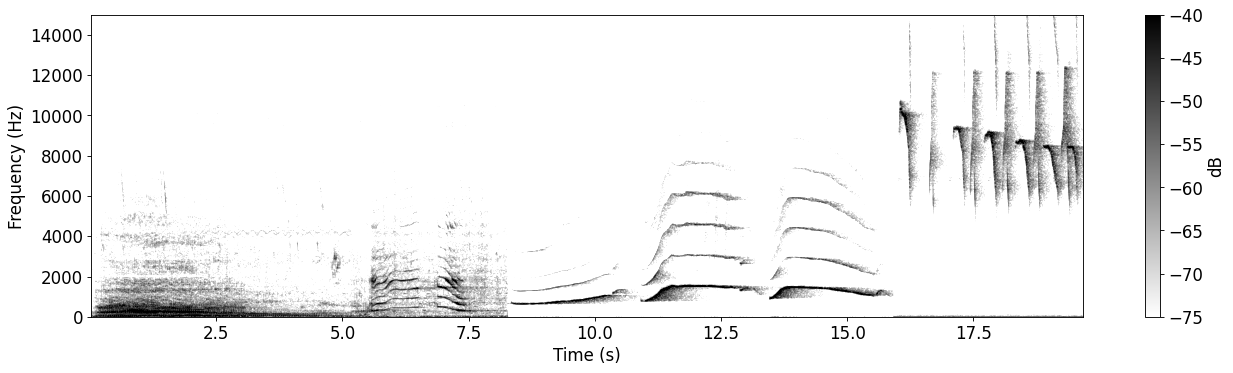

temporal resolution:  0.008541666666666666
spectral resolution:  23.4375


In [ ]:
# -- Plot figure 
# You can change the figure's dimensions by changing figsize=(width, height)

fig=plt.figure(figsize=(20, 5), dpi=80)
p, freq, time, im = plt.specgram(x, NFFT=nfft, 
                                 Fs=fs, noverlap=round((overlap/100)*nfft),
                                 vmin = clim[0], vmax=clim[1])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.ylim([0, 1000]) # To limit the frequency axis

# -- Add a colorbar to the plot
cb = plt.colorbar(im) 
cb.set_label('dB') # label for the colorbar

# -- Change the font for all elements of the figure
plt.rcParams.update({'font.size': 15})

plt.show()

# -- Save figure
fig.savefig(my_fig_name + '.png', dpi=350,
        orientation='portrait', bbox_inches="tight")

print("temporal resolution: ", time[1]-time[0])
print("spectral resolution: ", freq[1]-freq[0])